In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('COVID-19 DEADTH CASE')

In [3]:
data

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [4]:
data.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [5]:
data.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0
6602,2020-05-18,Saint Pierre Miquelon,5797,NaN,1.0,NaN,1.0,NaN,0.0


In [6]:
data.shape

(6603, 9)

In [7]:
data.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

In [8]:
data.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [9]:
data.isnull().sum()

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [10]:
#There are so many null values are present in the dataset we will deal with them 

In [11]:
data=data.replace(np.NaN,0)
# Replacing the NaN value with the 0

In [12]:
data.isnull().sum()

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [13]:
#Now no null value are present in the dataset

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          6603 non-null   float64
 4   Total Cases          6603 non-null   float64
 5   Total Deaths         6603 non-null   float64
 6   Total Recovered      6603 non-null   float64
 7   Serious or Critical  6603 non-null   float64
 8   Active Cases         6603 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


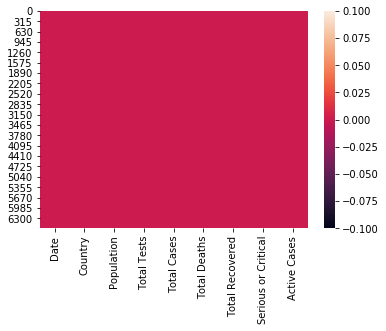

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,6.603000e+03,6.603000e+03,6.603000e+03,6603.000000,6603.000000,6603.000000,6.603000e+03
mean,3.637913e+07,1.806864e+05,1.680405e+04,1151.147206,5602.691201,241.139331,9.875109e+03
std,1.411537e+08,6.981654e+05,8.829716e+04,6016.411612,22986.345036,1322.814259,6.512407e+04
min,8.010000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,8.672680e+05,5.720000e+02,7.600000e+01,1.000000,17.000000,0.000000,2.500000e+01
50%,6.859926e+06,1.076100e+04,5.940000e+02,11.000000,183.000000,2.000000,2.600000e+02
75%,2.546422e+07,1.019110e+05,4.757000e+03,109.000000,1302.500000,27.000000,1.991000e+03
max,1.439324e+09,1.230074e+07,1.550294e+06,91981.000000,356383.000000,18671.000000,1.101930e+06


In [17]:
#1) The mean higher in some columns which are Population TOtal deadth,  total recovered , serious or critical and in activecases 
#2) Apart from that the 50 % is higher 
#3)Their is large difference in 75% and max in Population, Total cases, Total Deaths, Total Recovered and in serious or critical.


In [18]:
datacor=data.corr()
datacor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.216558,0.226144,0.184892,0.310775,0.172346,0.179594
Total Tests,0.216558,1.000000,0.898474,0.812389,0.795354,0.745878,0.855270
Total Cases,0.226144,0.898474,1.000000,0.935250,0.818957,0.892289,0.975015
Total Deaths,0.184892,0.812389,0.935250,1.000000,0.795902,0.833374,0.881876
Total Recovered,0.310775,0.795354,0.818957,0.795902,1.000000,0.723509,0.685120
Serious or Critical,0.172346,0.745878,0.892289,0.833374,0.723509,1.000000,0.875839
Active Cases,0.179594,0.855270,0.975015,0.881876,0.685120,0.875839,1.000000


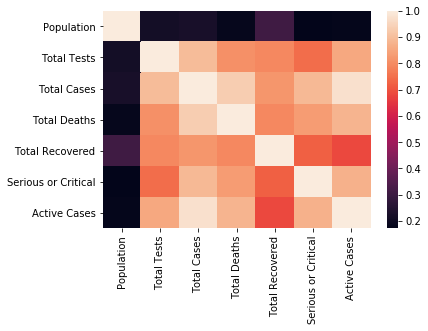

In [19]:
sns.heatmap(datacor)

In [20]:
#from the above graph i can say that their is positive correlation among all expect from population it has negative correlation.

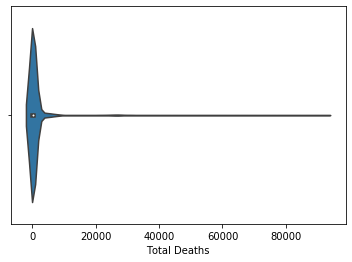

In [21]:
sns.violinplot(x='Total Deaths',data=data)
plt.show()

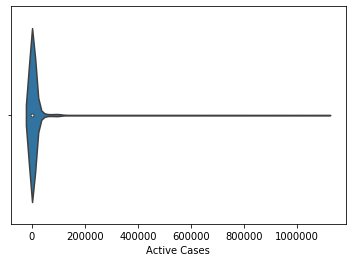

In [22]:
sns.violinplot(x='Active Cases',data=data)
plt.show()

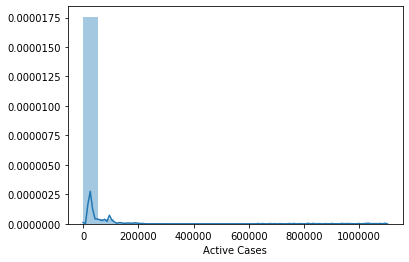

In [23]:
sns.distplot(data['Active Cases'],bins=20)
plt.show()

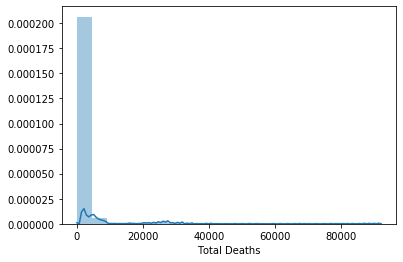

In [24]:
sns.distplot(data['Total Deaths'],bins=20)
plt.show()

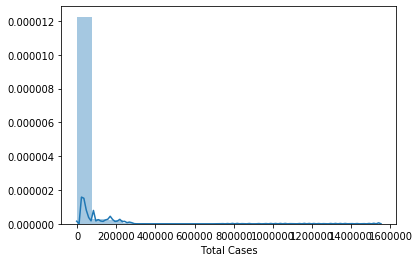

In [25]:
sns.distplot(data['Total Cases'],bins=20)
plt.show()

In [26]:
data.columns

Index(['Date', 'Country', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

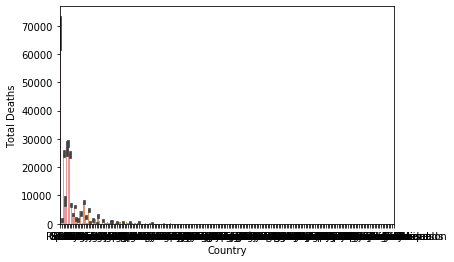

In [27]:
sns.barplot(x='Country',y='Total Deaths',data=data)
plt.show

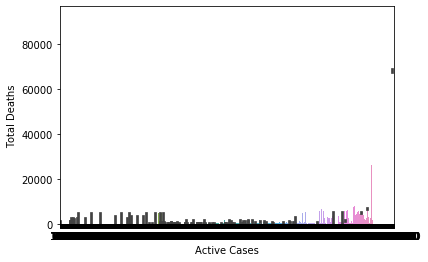

In [28]:
sns.barplot(x="Active Cases",y="Total Deaths",data=data)
plt.show()

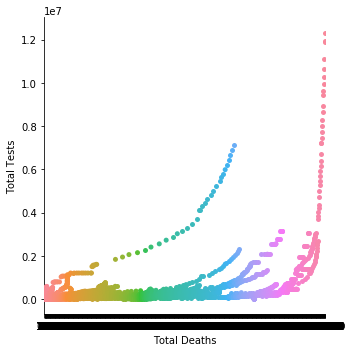

In [32]:
sns.catplot(x='Total Deaths',y='Total Tests',data=data)

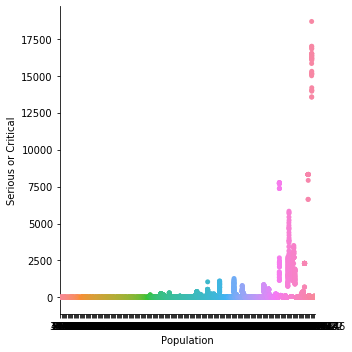

In [33]:
sns.catplot(x='Population',y='Serious or Critical',data=data)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Date']=le.fit_transform(data['Date'])
data['Country']=le.fit_transform(data['Country'])

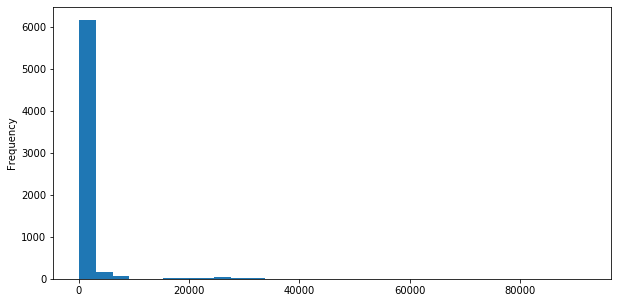

In [35]:
plt.figure(figsize=(10,5))
data[data['Country']!=0]['Total Deaths'].plot.hist(bins=30)

In [36]:
data.skew()

Date                    0.000000
Country                 0.000000
Population              8.743503
Total Tests             9.303605
Total Cases            12.079292
Total Deaths            8.968843
Total Recovered         7.223984
Serious or Critical     9.246370
Active Cases           13.301451
dtype: float64

In [39]:
# Treating using log
import numpy as np
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [40]:
data.skew()

Date                   0.000000
Country                0.000000
Population            -0.672563
Total Tests           -0.789203
Total Cases            0.139480
Total Deaths          -0.303786
Total Recovered        0.208199
Serious or Critical    0.293703
Active Cases           0.071499
dtype: float64

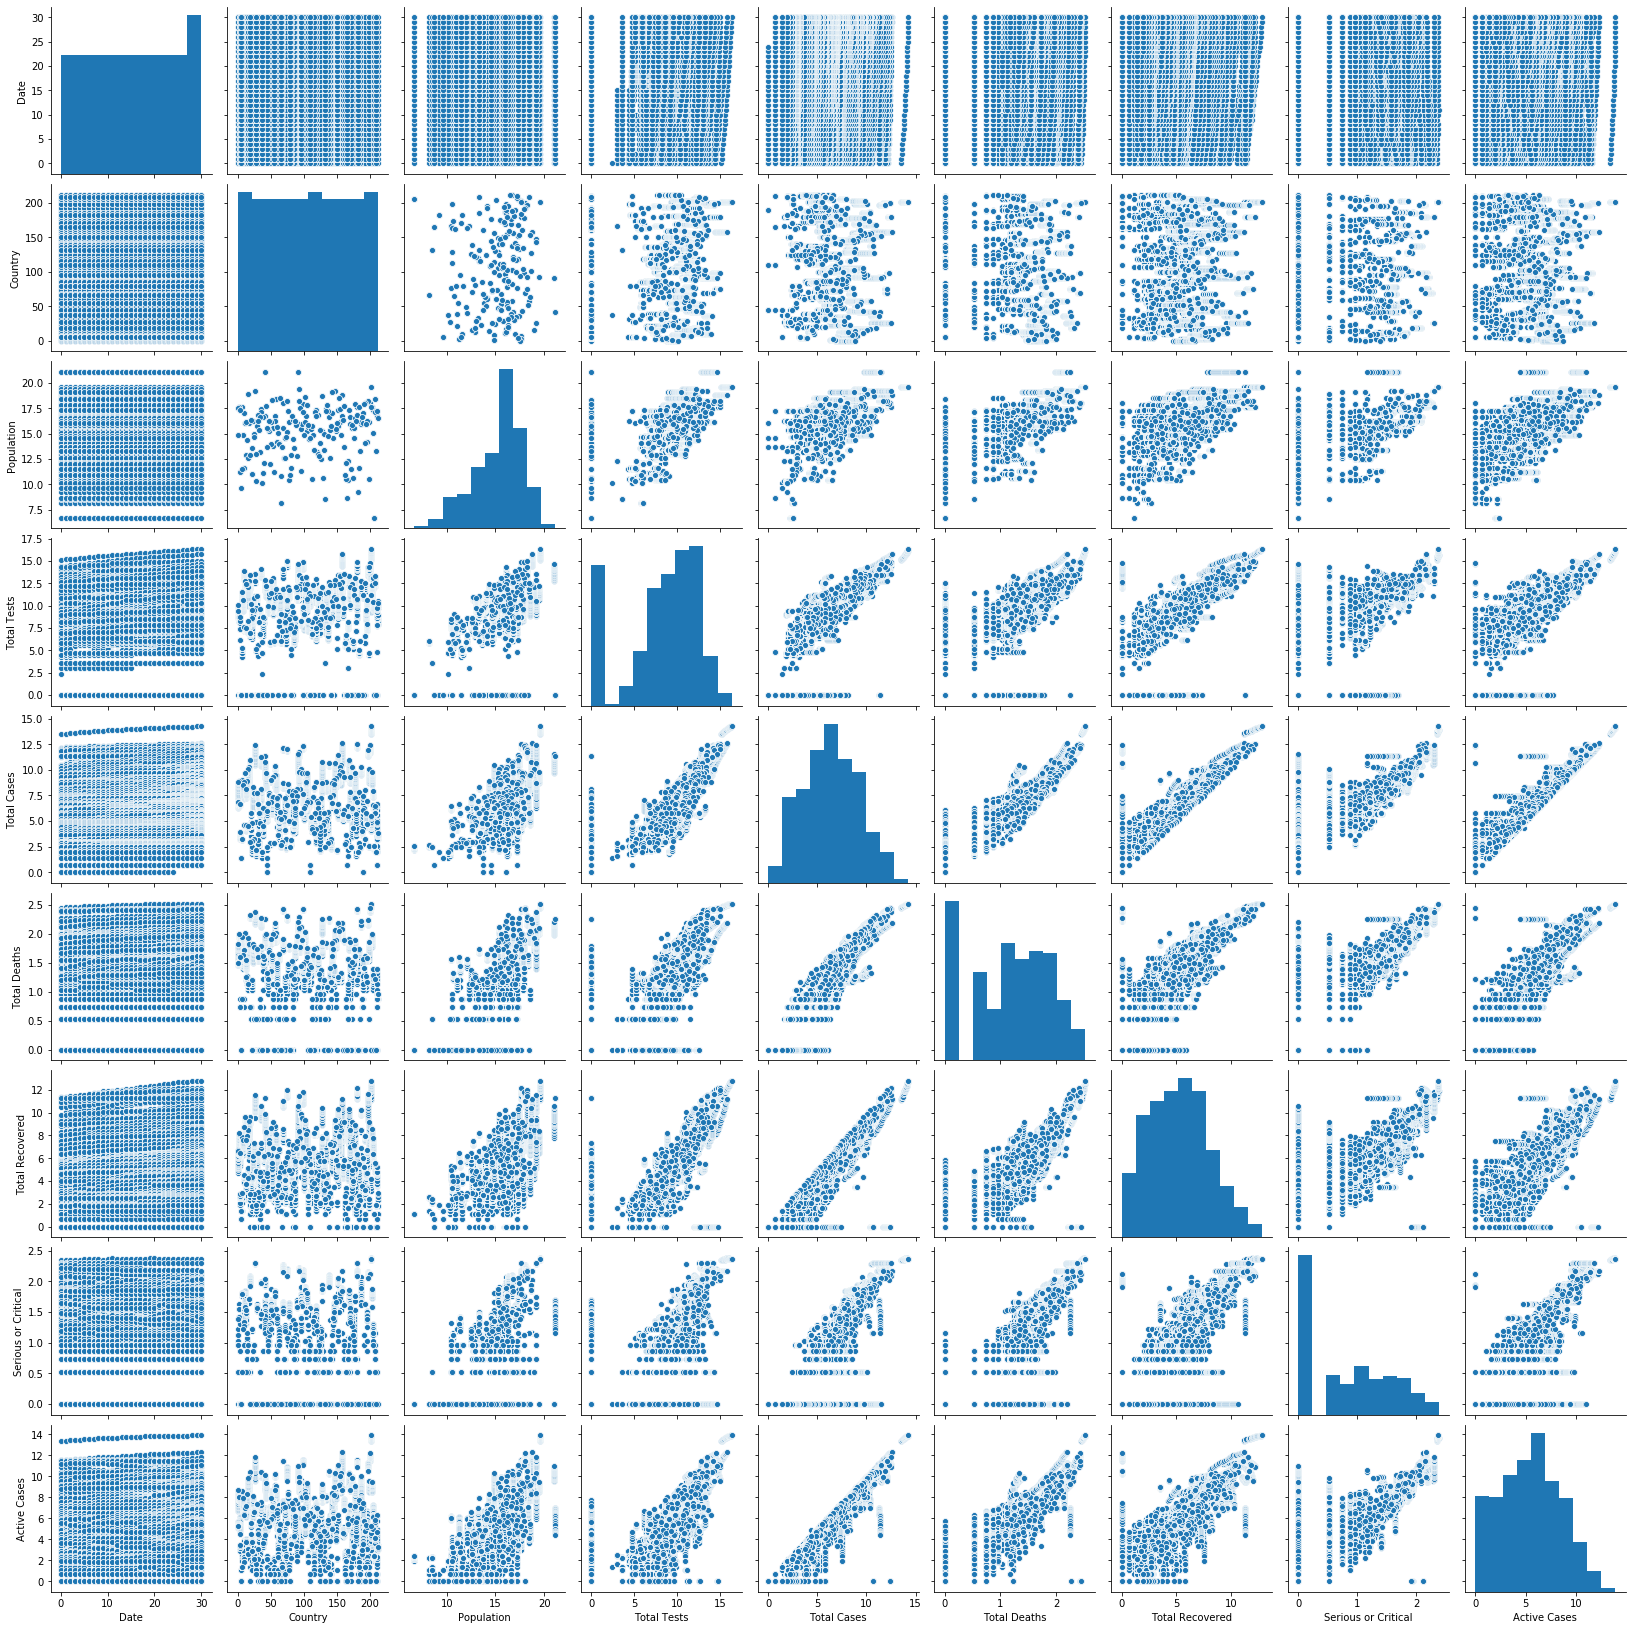

In [41]:
#Lets check pairplot using seaborn library
import seaborn as sns
sns.pairplot(data)
plt.show()

In [42]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(6603, 9)
(6572, 9)


In [43]:
#so from the data the 31 outliers are removed 

In [44]:
# Separating target and input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data_final)
x=pd.DataFrame(x,columns=data_final.columns)

In [45]:
x
x.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,-1.677051,1.558816,1.746829,1.585944,2.552035,1.756289,2.120563,2.077939,2.621610
1,-1.677051,0.856733,1.419052,1.422131,1.475400,1.016659,1.003414,0.477201,1.641713
2,-1.677051,1.215938,0.963139,1.265546,2.072877,1.674963,2.153411,1.997730,2.005704
3,-1.677051,-1.298500,1.569366,0.643402,1.474707,1.375522,1.551330,1.983355,1.476038
4,-1.677051,1.542489,1.112278,1.103049,1.881971,1.641942,-1.883429,1.768427,2.001773


In [46]:
y=data_final.iloc[:,-4]
y.head()

0    2.448563
1    1.909453
2    2.389284
3    2.171025
4    2.365216
Name: Total Deaths, dtype: float64

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1154,  300, 1040, ...,    0,    0,    0], dtype=int64)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [49]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.5921275801095647
r2 score corresponding to  43  is  0.5841887701316957
r2 score corresponding to  44  is  0.5912192747977141
r2 score corresponding to  45  is  0.5831050833407343
r2 score corresponding to  46  is  0.5739896215475979
r2 score corresponding to  47  is  0.597049007993249
r2 score corresponding to  48  is  0.593811887600193
r2 score corresponding to  49  is  0.5931405550395912
r2 score corresponding to  50  is  0.5902356115169919
r2 score corresponding to  51  is  0.6086975458792299
r2 score corresponding to  52  is  0.5793020753424685
r2 score corresponding to  53  is  0.6073632261782683
r2 score corresponding to  54  is  0.5727194966348697
r2 score corresponding to  55  is  0.579445995887371
r2 score corresponding to  56  is  0.5955543981760776
r2 score corresponding to  57  is  0.6016349889977233
r2 score corresponding to  58  is  0.5908331976517318
r2 score corresponding to  59  is  0.5928148705940562
r2 score corresponding to  60  

In [50]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 1}

In [51]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=1)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.9996045008586504
r2 score corresponding to  43  is  0.9997209184095048
r2 score corresponding to  44  is  0.9997578264898354
r2 score corresponding to  45  is  0.999506474747568
r2 score corresponding to  46  is  0.9996455778146389
r2 score corresponding to  47  is  0.999639868640924
r2 score corresponding to  48  is  0.9997431266398398
r2 score corresponding to  49  is  0.9995882760181941
r2 score corresponding to  50  is  0.9996844817266147
r2 score corresponding to  51  is  0.9996709200568047
r2 score corresponding to  52  is  0.9992632456680455
r2 score corresponding to  53  is  0.9997160996678539
r2 score corresponding to  54  is  0.9997160891945334
r2 score corresponding to  55  is  0.9996634378987805
r2 score corresponding to  56  is  0.9996700796676672
r2 score corresponding to  57  is  0.9997127689002077
r2 score corresponding to  58  is  0.999574030042633
r2 score corresponding to  59  is  0.9996985090631032
r2 score corresponding to  60  

In [52]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
#Based on below output KNN Regression is performing well

Mean r2 score for Linear Regression : 0.5860350414931974
standard deviation in r2 score for Linear Regression: 0.019973574826579646

Mean r2 score for KNN Regression: 0.9912397754102992
standard deviation in r2 score for KNN Regression:  0.010196757663172422


In [53]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [54]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=1)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.5890632071608654
r2 score corresponding to  43  is  0.5839927553273119
r2 score corresponding to  44  is  0.5903154147349494
r2 score corresponding to  45  is  0.5817880766343142
r2 score corresponding to  46  is  0.5745466950373568
r2 score corresponding to  47  is  0.5943772497297405
r2 score corresponding to  48  is  0.5936787334095859
r2 score corresponding to  49  is  0.5926063727228452
r2 score corresponding to  50  is  0.5858190783978718
r2 score corresponding to  51  is  0.6060704957791296
r2 score corresponding to  52  is  0.57747522658566
r2 score corresponding to  53  is  0.6063408627823046
r2 score corresponding to  54  is  0.5729242439183617
r2 score corresponding to  55  is  0.5812644619727032
r2 score corresponding to  56  is  0.5920207661633722
r2 score corresponding to  57  is  0.6014391359575568
r2 score corresponding to  58  is  0.590926639695227
r2 score corresponding to  59  is  0.5897403740511373
r2 score corresponding to  60  

In [55]:
#Lets use cross val score with lasso
print("Mean r2_score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#Based on below output i can say lasso performed better than the linear regression

Mean r2_score for Lasso Regression:  0.5864344746210488
standard deviation in r2 score for Lasso Regression:  0.022600225159902534


In [56]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [57]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=1,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  0.9994299209445648
standard deviation in r2 score for gradient boosting Regression:  0.00043088986793893486


In [58]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.9998870210946927
r2 score corresponding to  43  is  0.9998594890097237
r2 score corresponding to  44  is  0.9998229857179444
r2 score corresponding to  45  is  0.9998185745293259
r2 score corresponding to  46  is  0.9996215368361563
r2 score corresponding to  47  is  0.9998450983111993
r2 score corresponding to  48  is  0.9995814583279464
r2 score corresponding to  49  is  0.9998311192982453
r2 score corresponding to  50  is  0.9998366976267957
r2 score corresponding to  51  is  0.9998805905007424
r2 score corresponding to  52  is  0.9998398030548412
r2 score corresponding to  53  is  0.9997213851001981
r2 score corresponding to  54  is  0.9998757587312683
r2 score corresponding to  55  is  0.9995767761219239
r2 score corresponding to  56  is  0.9994266993249022
r2 score corresponding to  57  is  0.999823617757258
r2 score corresponding to  58  is  0.9998689085288843
r2 score corresponding to  59  is  0.9997634242326123
r2 score corresponding to  60

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 66,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [63]:
#Lets find the rmse and r2_score using sklearn,metrics 
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1.6492381294549519
r2_score is:  0.9999626081204778


In [64]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(lreg, "Deadth_gbr.pkl")

['Deadth_gbr.pkl']

Conclusion : In this dataset firstly i look the data since i have to predict the deadth of COVID-19  so i take it
as a Y variable and rest column was taken as a X before spliting the dataset i check the datatype and change the datatype
of the columns and see the correlation , null values , description, skewness and pairplot i check the outlier and removed outlier.
Than i split the data into x and y and apply the standard scaler in x and in y the label encoder.

I apply the algorithm of LinearRegression r2score of 98 is 0.61
I apply the algorithm of KNeighbors r2score of 88 is 0.99
I apply the algorithm of Lasso r2score of 98 is 0.60
I apply the algorithm of GradientBoostingRegressor r2score of 66 is 0.99
I apply the algorithm of AdaBoostRegressor r2score of 61 is 0.99

so best among that was GradientBoostingRegressor So I have saved that model.